## Import Modules

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
sheet_id='1hWHfyDQUsEe9JQVd2GoT9O_roI-bkL0GiYZvZ6zh_2Y'
df=pd.read_csv(f"https://docs.google.com/spreadsheets/d/{sheet_id}/export?format=csv")
print(df)

           Date      Time  Smoke level  Fire Level  Fire Class
0    21/09/2023  18:20:48           73            0          a
1    21/09/2023  18:20:52           73            0          a
2    21/09/2023  18:20:55           72            0          a
3    21/09/2023  18:20:58           72            0          a
4    21/09/2023  18:21:02           70            0          a
..          ...       ...          ...          ...        ...
894  29/10/2023  23:18:14           85            0          a
895  29/10/2023  23:18:16           84            0          a
896  29/10/2023  23:18:19           84            0          a
897  29/10/2023  23:18:22           84            0          a
898  29/10/2023  23:18:24           84            0          a

[899 rows x 5 columns]


In [19]:
df.columns

Index(['Date', 'Time', 'Smoke level', 'Fire Level ', 'Fire Class'], dtype='object')

In [20]:
df.drop(['Date','Time'] , axis=1 , inplace=True)

In [21]:
df

,Smoke level,Fire Level,Fire Class
0,73,0,a
1,73,0,a
2,72,0,a
3,72,0,a
4,70,0,a
...,...,...,...
894,85,0,a
895,84,0,a
896,84,0,a
897,84,0,a


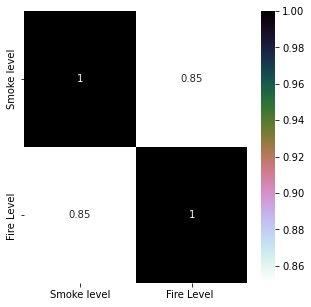

In [22]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr(), annot=True, cmap='cubehelix_r') # draws heatmap
plt.show()

## Data Visualization

In [23]:
df.columns

Index(['Smoke level', 'Fire Level ', 'Fire Class'], dtype='object')

In [24]:
mag="magma"

<AxesSubplot:xlabel='Fire Class', ylabel='count'>

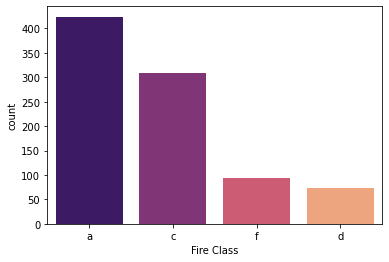

In [25]:
sns.countplot(x="Fire Class",data=df,palette=mag)

## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix 

In [27]:
X = df.drop(columns='Fire Class', axis =1)
Y = df['Fire Class']

In [28]:
# training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify=Y, random_state=2)

In [29]:
print(X.shape, X_train.shape, X_test.shape)

(899, 2) (719, 2) (180, 2)


## Logistic Regression model

In [30]:
model = LogisticRegression()

In [31]:
model.fit(X_train, Y_train)

C:\Users\vedantkadam\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [32]:
# accuracy score on the training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)
print('Accuracy score of the training data : ', training_data_accuracy*100)

Accuracy score of the training data :  99.58275382475661


In [33]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)
print('Accuracy score of the test data : ', test_data_accuracy*100)

Accuracy score of the test data :  97.77777777777777


## Decision Tree

In [34]:
from sklearn.tree import DecisionTreeClassifier

In [35]:
dis_tree = DecisionTreeClassifier()
dis_tree.fit(X_train, Y_train)
prediction_dis = dis_tree.predict(X_test)
print('The accuracy of Decision Tree is: ', test_data_accuracy)

The accuracy of Decision Tree is:  0.9777777777777777


In [36]:
# accuracy score on the test data
X_test_prediction = model.predict(X_test)
print('Accuracy score of the test data : ', test_data_accuracy*100)

Accuracy score of the test data :  97.77777777777777


In [37]:
from sklearn.metrics import classification_report
print(classification_report(Y_test,prediction_dis))

              precision    recall  f1-score   support

           a       1.00      1.00      1.00        85
           c       1.00      1.00      1.00        62
           d       1.00      1.00      1.00        14
           f       1.00      1.00      1.00        19

    accuracy                           1.00       180
   macro avg       1.00      1.00      1.00       180
weighted avg       1.00      1.00      1.00       180



# KNN Algorithm

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn import metrics # for checking the model accuracy# KNN classifier

In [39]:
knn_m = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
knn_m.fit(X_train, Y_train)
prediction1 = knn_m.predict(X_test)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction1, Y_test))

The accuracy of KNN is:  0.9888888888888889


In [40]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,prediction1))

              precision    recall  f1-score   support

           a       0.98      1.00      0.99        85
           c       1.00      0.97      0.98        62
           d       1.00      1.00      1.00        14
           f       1.00      1.00      1.00        19

    accuracy                           0.99       180
   macro avg       0.99      0.99      0.99       180
weighted avg       0.99      0.99      0.99       180



In [47]:
print('The accuracy of the Logistic Regression is: ', metrics.accuracy_score(X_test_prediction, Y_test))
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction_dis, Y_test))
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction1, Y_test))

The accuracy of the Logistic Regression is:  0.9777777777777777
The accuracy of Decision Tree is:  1.0
The accuracy of KNN is:  0.9888888888888889


In [42]:
X_test.iloc[:,:-1]

,Smoke level
730,408
184,190
349,266
542,445
286,240
...,...
833,103
68,121
574,377
56,138


In [45]:
display(pd.DataFrame({"Hours Studied":X_test.iloc[:,:-1].values.flatten(),"Predicted Score":X_test_prediction,"Actual Score":Y_test}))

,Hours Studied,Predicted Score,Actual Score
730,408,d,d
184,190,a,a
349,266,c,c
542,445,d,d
286,240,c,c
...,...,...,...
833,103,a,a
68,121,a,a
574,377,c,c
56,138,a,a
